#### Coment Toxicity CNN

In [1]:
! pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset=pd.read_csv("C:\\Users\\Dell\\Downloads\\train (2).csv")
dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df=pd.DataFrame(dataset)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.shape

(159571, 8)

In [6]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [7]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [8]:
toxic_cols=['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
df["Toxic_label"]=df[toxic_cols].any(axis=1).astype(int)

In [9]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Toxic_label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [10]:
comment_distribution=pd.DataFrame({"toxic":df["toxic"].sum(),"severe_toxic":df["severe_toxic"].sum(),"obscene":df["obscene"].sum(),"threat":df["threat"].sum(),
                                   "threat":df["threat"].sum(),"insult":df["insult"].sum(),"identity_hate":df["identity_hate"].sum()},index=["value"])
comment_distribution_df=comment_distribution.T.reset_index()
comment_distribution_df

,index,value
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


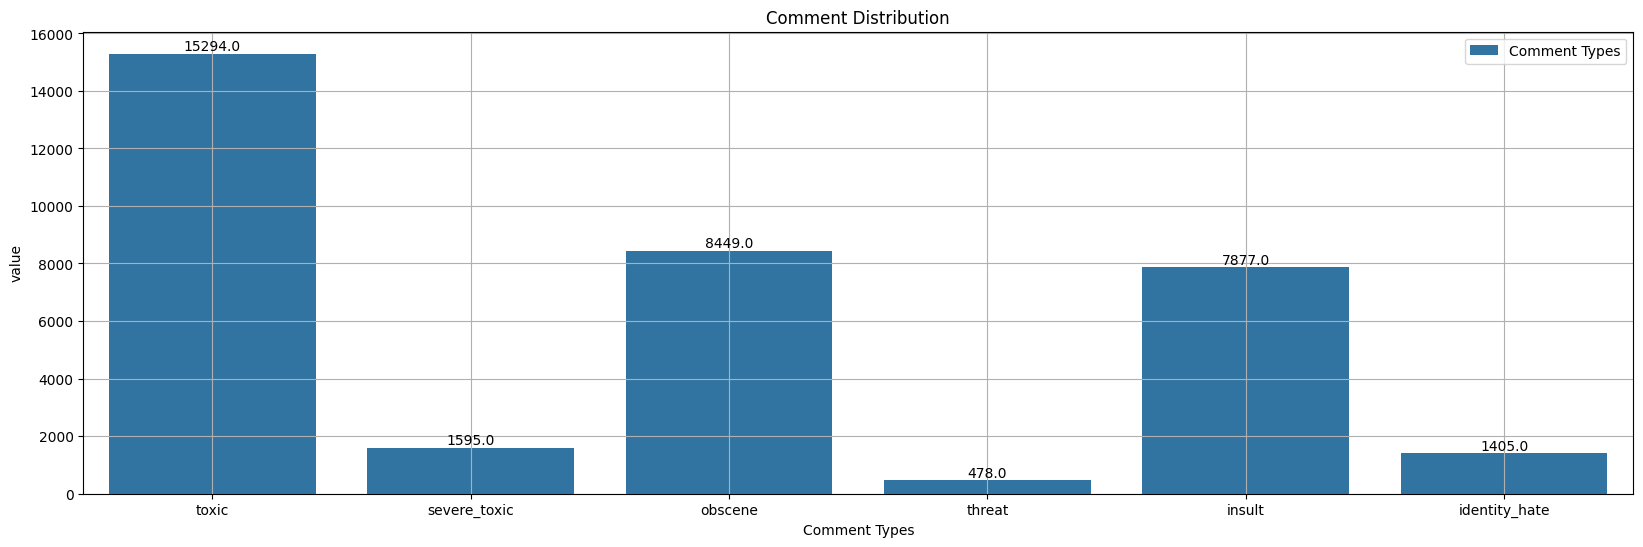

In [11]:
plt.figure(figsize=(20,6))
bar=sns.barplot(x="index",y="value",data=comment_distribution_df,label="Comment Types")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{height}",ha="center",va="bottom")
plt.title("Comment Distribution")
plt.xlabel("Comment Types")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
df.drop(['id', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],axis=1,inplace=True)

In [13]:
df.head()

,comment_text,Toxic_label
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


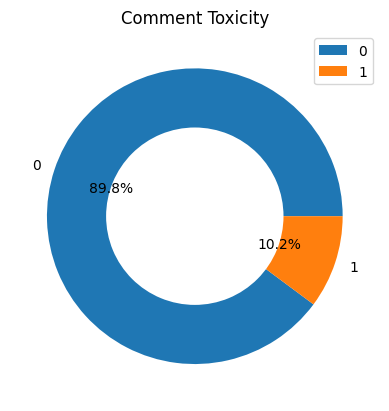

In [14]:
toxic_label=df["Toxic_label"].value_counts().reset_index()
toxic_label
plt.pie(x=toxic_label["count"],labels=toxic_label["Toxic_label"],autopct="%1.1f%%")
plt.title("Comment Toxicity")
plt.pie([1],colors="white",radius=0.6)
plt.legend(loc=1)
plt.show()

In [15]:
df[df["Toxic_label"]==1]["comment_text"][6]

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [16]:
import re
def remove_num(text):
    return re.sub(r'\d+'," ",text)

df["comment_text"]=df["comment_text"].apply(remove_num)

In [17]:
! pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import nltk
nltk.download("stopwords")
nltk.download("owm-1.4")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading owm-1.4: Package 'owm-1.4' not found in
[nltk_data]     index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
stopword=stopwords.words("english")

In [20]:
from nltk.tokenize import word_tokenize

In [21]:
from nltk.stem import WordNetLemmatizer
lam=WordNetLemmatizer()

In [22]:
import string
def clean_text(text):
    text=text.lower()
    text=text.translate(str.maketrans("","",string.punctuation))
    text=re.sub(r'[^a-zA-Z]'," ",text)
    words=word_tokenize(text)
    clean_word=[lam.lemmatize(word) for word in words if word not in stopword and len(word)>2]
    return " ".join(clean_word)

df["clean_text"]=df["comment_text"].apply(clean_text)

In [23]:
df.head()

,comment_text,Toxic_label,clean_text
0,Explanation\nWhy the edits made under my usern...,0,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,daww match background colour seemingly stuck t...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man really trying edit war guy constantly ...
3,"""\nMore\nI can't make any real suggestions on ...",0,cant make real suggestion improvement wondered...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page thats


In [24]:
x=df["clean_text"]
y=df["Toxic_label"]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_test

119105    geez forgetful weve already discussed marx ana...
131631    carioca rfa thanks support request adminship f...
125326                        birthday worry enjoy daytalke
111256    pseudoscience category assuming article pseudo...
83590     phrase exists would provided search engine eve...
                                ...                        
121162                   would claim part ignorant majority
34019              lyric found german version assume usable
83938     encyclopedia titanica reference source origina...
78687                        silly fat cow wont leave alone
127984    shazbot lieing already stated couldnt comment ...
Name: clean_text, Length: 31915, dtype: object

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer #type:ignore
tokenizer=Tokenizer(num_words=5000,oov_token="<OOV>")


In [28]:
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [29]:
tokenizer.word_index

{'<OOV>': 1,
 'article': 2,
 'page': 3,
 'wikipedia': 4,
 'talk': 5,
 'one': 6,
 'please': 7,
 'would': 8,
 'like': 9,
 'dont': 10,
 'see': 11,
 'source': 12,
 'think': 13,
 'also': 14,
 'know': 15,
 'time': 16,
 'people': 17,
 'edit': 18,
 'use': 19,
 'make': 20,
 'may': 21,
 'get': 22,
 'say': 23,
 'need': 24,
 'user': 25,
 'thanks': 26,
 'even': 27,
 'name': 28,
 'link': 29,
 'want': 30,
 'good': 31,
 'information': 32,
 'way': 33,
 'well': 34,
 'could': 35,
 'image': 36,
 'comment': 37,
 'editor': 38,
 'section': 39,
 'deletion': 40,
 'thing': 41,
 'help': 42,
 'first': 43,
 'question': 44,
 'fact': 45,
 'new': 46,
 'look': 47,
 'work': 48,
 'editing': 49,
 'point': 50,
 'discussion': 51,
 'edits': 52,
 'thank': 53,
 'right': 54,
 'made': 55,
 'many': 56,
 'much': 57,
 'really': 58,
 'find': 59,
 'used': 60,
 'take': 61,
 'reference': 62,
 'ive': 63,
 'deleted': 64,
 'fuck': 65,
 'read': 66,
 'since': 67,
 'add': 68,
 'change': 69,
 'list': 70,
 'someone': 71,
 'reason': 72,
 'poli

In [30]:
print(len(tokenizer.word_index))

212639


In [31]:
tokenizer.word_counts

OrderedDict([('grandma', 30),
             ('terri', 48),
             ('burn', 230),
             ('trash', 163),
             ('hate', 3605),
             ('hell', 1531),
             ('may', 15585),
             ('utc', 6838),
             ('would', 29213),
             ('easiest', 71),
             ('admit', 748),
             ('member', 2751),
             ('involved', 2136),
             ('portuguese', 188),
             ('lodge', 82),
             ('requirement', 574),
             ('acknowledge', 305),
             ('whether', 3463),
             ('previous', 1560),
             ('account', 4752),
             ('carlos', 64),
             ('botelho', 1),
             ('good', 12670),
             ('record', 1930),
             ('remove', 5257),
             ('sockpuppet', 709),
             ('template', 3943),
             ('irrelevant', 1092),
             ('wpcoi', 106),
             ('permit', 125),
             ('people', 18750),
             ('edit', 17603),
             (

In [32]:
x_train_seq=tokenizer.texts_to_sequences(x_train)
x_test_seq=tokenizer.texts_to_sequences(x_test)

In [33]:
x_train_seq[0]

[1, 1, 2979, 3778, 1, 1, 3778, 241, 1, 1, 607]

In [34]:
print(type(x_train_seq))

<class 'list'>


In [35]:
print(len(x_train_seq[0]))
print(len(x_train_seq[1]))

11
38


In [36]:
from keras.utils import pad_sequences
x_train_pad=pad_sequences(x_train_seq,padding="post",maxlen=100)
x_test_pad=pad_sequences(x_test_seq,padding="post",maxlen=100)

In [37]:
x_train_pad[0]

array([   1,    1, 2979, 3778,    1,    1, 3778,  241,    1,    1,  607,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [38]:
print(type(x_train_pad[0]))

<class 'numpy.ndarray'>


In [39]:
x_train_pad.shape

(127656, 100)

In [40]:
print(len(x_train_pad[0]))
print(len(x_train_pad[1]))

100
100


In [41]:
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import Conv1D,Embedding,Dense,Dropout,GlobalMaxPooling1D #type:ignore

In [42]:
classif=Sequential()

classif.add(Embedding(input_dim=5000,output_dim=100,input_length=100))
classif.add(Conv1D(filters=128,kernel_size=5,activation="relu"))
classif.add(GlobalMaxPooling1D())
classif.add(Dense(units=64,activation="relu"))
classif.add(Dropout(0.2))
classif.add(Dense(units=1,activation="sigmoid"))

In [43]:
classif.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [44]:
from keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor="val_loss",patience=2,restore_best_weights=True)
model=classif.fit(x_train_pad,y_train,validation_data=(x_test_pad,y_test),batch_size=32,epochs=15,callbacks=[earlystopping])

Epoch 1/15
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 83s 20ms/step - accuracy: 0.9519 - loss: 0.1396 - val_accuracy: 0.9571 - val_loss: 0.1177
Epoch 2/15
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 68s 17ms/step - accuracy: 0.9624 - loss: 0.1011 - val_accuracy: 0.9583 - val_loss: 0.1216
Epoch 3/15
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 67s 17ms/step - accuracy: 0.9734 - loss: 0.0711 - val_accuracy: 0.9563 - val_loss: 0.1319


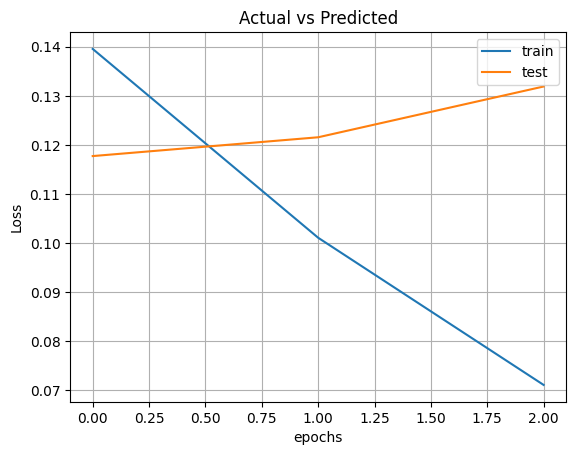

In [45]:
plt.plot(model.history["loss"],label="train")
plt.plot(model.history["val_loss"],label="test")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

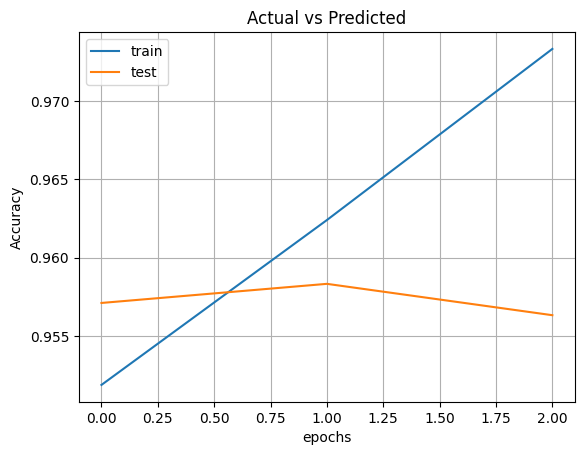

In [46]:
plt.plot(model.history["accuracy"],label="train")
plt.plot(model.history["val_accuracy"],label="test")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [47]:
y_pred_test=classif.predict(x_test_pad)
y_pred_test_real=(y_pred_test>0.5).astype(int)

998/998 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [48]:
y_pred_train=classif.predict(x_train_pad)
y_pred_train_real=(y_pred_train>0.5).astype(int)

3990/3990 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step


In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test_real))
print(accuracy_score(y_train,y_pred_train_real))

0.9571048096506345
0.9600645484740239


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test_real))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28671
           1       0.93      0.62      0.75      3244

    accuracy                           0.96     31915
   macro avg       0.95      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915



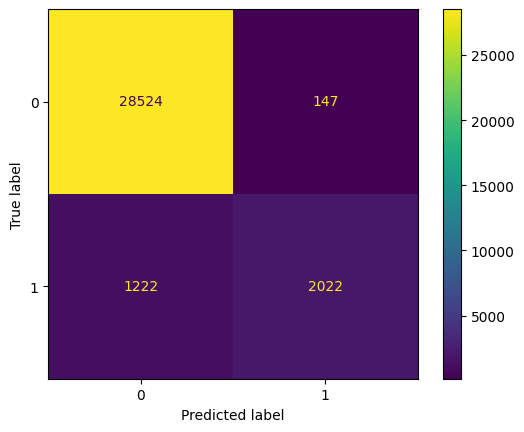

In [51]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_test_real)
ConfusionMatrixDisplay(cm).plot()
plt.show()

998/998 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


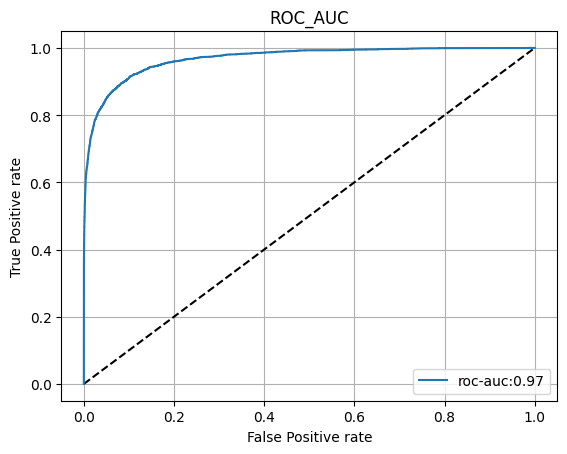

In [52]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob=classif.predict(x_test_pad)

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],linestyle="dashed",color="black")
plt.plot(fpr,tpr,label=f"roc-auc:{round(roc_auc_score(y_test,y_pred_prob),2)}")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC_AUC")
plt.grid(True)
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import precision_score
precision_score=precision_score(y_test,y_pred_test_real)
print(precision_score)

0.9322268326417704


In [54]:
from sklearn.metrics import recall_score
Recall_score=recall_score(y_test,y_pred_test_real)
print(Recall_score)

0.6233045622688039


In [55]:
from sklearn.metrics import f1_score
F1_score=f1_score(y_test,y_pred_test_real)
print(F1_score)

0.7470903380750046


In [56]:
classif.save("toxic_cnn_model.h5")

In [57]:
import pickle
with open("tokenizer.pkl","wb") as file:
    pickle.dump(tokenizer,file)